In [1]:
%load_ext autoreload
%autoreload 2
from sympy import *
import numpy as np
from robot_arms import *
import matplotlib.pyplot as plt

In [2]:
q1, q2, q3, q4 = symbols('q1 q2 q3 q4')
I1xx, I1yy, I1zz = symbols('I_{1xx}, I_{1yy} I_{1zz}')
I2xx, I2yy, I2zz = symbols('I_{2xx}, I_{2yy} I_{2zz}')
I3xx, I3yy, I3zz = symbols('I_{3xx}, I_{3yy} I_{3zz}')
I4xx, I4yy, I4zz = symbols('I_{4xx}, I_{4yy} I_{4zz}')
l1, l2, l3, l4 = symbols('L1 L2 L3 L4')
lc1, lc2, lc3, lc4 = symbols('L_{c1} L_{c2} L_{c3} L_{C4}')
theta = symbols('theta')


In [3]:
I1xx

I_{1xx}

# D1

In [4]:
D1 = Matrix(((I1yy, 0, 0, 0),
             (0, 0, 0, 0),
             (0, 0, 0, 0),
             (0, 0, 0, 0)))
D1

Matrix([
[I_{1yy}, 0, 0, 0],
[      0, 0, 0, 0],
[      0, 0, 0, 0],
[      0, 0, 0, 0]])

In [5]:
R01 = Matrix(((cos(q1), 0, sin(q1)),
              (sin(q1), 0, -cos(q1)),
              (0, 1, 0)))
R01

Matrix([
[cos(q1), 0,  sin(q1)],
[sin(q1), 0, -cos(q1)],
[      0, 1,        0]])

In [6]:
z0 = Matrix((0,0,1))
z1 = Matrix((sin(q1), -cos(q1), 0))
z1

Matrix([
[ sin(q1)],
[-cos(q1)],
[       0]])

# D2

In [7]:
I2 = Matrix(((I2xx,0,0),
             (0,I2yy, 0),
             (0,0,I2zz)))

In [48]:
R2 = Matrix(((-cos(q1) * sin(q2), -cos(q1)*cos(q2), sin(q1)),
             (-sin(q1)*sin(q2), -sin(q1)*cos(q2), -cos(q1)),
             (cos(q2), -sin(q2), 0)))
R2

Matrix([
[-sin(q2)*cos(q1), -cos(q1)*cos(q2),  sin(q1)],
[-sin(q1)*sin(q2), -sin(q1)*cos(q2), -cos(q1)],
[         cos(q2),         -sin(q2),        0]])

In [9]:
J2w = Matrix(((0, sin(q1), 0, 0),
              (0, -cos(q1), 0, 0),
              (1, 0, 0, 0)))
J2w

Matrix([
[0,  sin(q1), 0, 0],
[0, -cos(q1), 0, 0],
[1,        0, 0, 0]])

In [10]:
D2w = J2w.T * R2 * I2 * R2.T * J2w
D2w

Matrix([
[I_{2xx}*cos(q2)**2 + I_{2yy}*sin(q2)**2, -(-I_{2xx}*sin(q1)*sin(q2)*cos(q2) + I_{2yy}*sin(q1)*sin(q2)*cos(q2))*cos(q1) + (-I_{2xx}*sin(q2)*cos(q1)*cos(q2) + I_{2yy}*sin(q2)*cos(q1)*cos(q2))*sin(q1), 0, 0],
[                                      0,                                                                  I_{2zz}*(sin(q1)**2 + cos(q1)**2)*sin(q1)**2 + I_{2zz}*(sin(q1)**2 + cos(q1)**2)*cos(q1)**2, 0, 0],
[                                      0,                                                                                                                                                            0, 0, 0],
[                                      0,                                                                                                                                                            0, 0, 0]])

In [11]:
c1 =  Matrix((0,0,l1 -0.020))
c1

Matrix([
[        0],
[        0],
[L1 - 0.02]])

In [12]:
c21 = Matrix((-cos(q1) * sin(q2), -sin(q1)*sin(q2), cos(q2))) # c2 from o1 position for cleaner computation, only direction, has to be multiplied by link lenght
c21

Matrix([
[-sin(q2)*cos(q1)],
[-sin(q1)*sin(q2)],
[         cos(q2)]])

In [13]:
zeros = Matrix((0,0,0))

In [14]:
Jv2 = simplify(Matrix.hstack(z0.cross(lc2*c21 + z0*l1), z1.cross(lc2*c21), zeros, zeros))
Jv2

Matrix([
[ L_{c2}*sin(q1)*sin(q2), -L_{c2}*cos(q1)*cos(q2), 0, 0],
[-L_{c2}*sin(q2)*cos(q1), -L_{c2}*sin(q1)*cos(q2), 0, 0],
[                      0,         -L_{c2}*sin(q2), 0, 0]])

In [15]:
D2v = 0.08*Jv2.T *  Jv2
D2v

Matrix([
[0.08*L_{c2}**2*sin(q1)**2*sin(q2)**2 + 0.08*L_{c2}**2*sin(q2)**2*cos(q1)**2,                                                                                                       0, 0, 0],
[                                                                          0, 0.08*L_{c2}**2*sin(q1)**2*cos(q2)**2 + 0.08*L_{c2}**2*sin(q2)**2 + 0.08*L_{c2}**2*cos(q1)**2*cos(q2)**2, 0, 0],
[                                                                          0,                                                                                                       0, 0, 0],
[                                                                          0,                                                                                                       0, 0, 0]])

In [16]:
D2 = simplify(D2v + D2w)
D2

Matrix([
[-1.0*I_{2xx}*sin(q2)**2 + 1.0*I_{2xx} + 1.0*I_{2yy}*sin(q2)**2 + 0.08*L_{c2}**2*sin(q2)**2,                            0, 0, 0],
[                                                                                         0, 1.0*I_{2zz} + 0.08*L_{c2}**2, 0, 0],
[                                                                                         0,                            0, 0, 0],
[                                                                                         0,                            0, 0, 0]])

# D3

In [17]:
I3 = Matrix(((I2xx, 0, 0),
             (0, I2yy, 0),
             (0, 0, I2zz)))
I3

Matrix([
[I_{2xx},       0,       0],
[      0, I_{2yy},       0],
[      0,       0, I_{2zz}]])

In [18]:
R3 = Matrix(((-cos(q1) * sin(q2 + q3), -cos(q1)*cos(q2 + q3), sin(q1)),
             (-sin(q1)*sin(q2 + q3), -sin(q1)*cos(q2 + q3), cos(q1)),
             (cos(q2 + q3), -sin(q2 + q3), 0)))
R3

Matrix([
[-sin(q2 + q3)*cos(q1), -cos(q1)*cos(q2 + q3), sin(q1)],
[-sin(q1)*sin(q2 + q3), -sin(q1)*cos(q2 + q3), cos(q1)],
[         cos(q2 + q3),         -sin(q2 + q3),       0]])

In [19]:
J3w = Matrix.hstack(z0, z1, z1, zeros)
J3w

Matrix([
[0,  sin(q1),  sin(q1), 0],
[0, -cos(q1), -cos(q1), 0],
[1,        0,        0, 0]])

In [20]:
c32 = Matrix((-cos(q1) * sin(q2 + q3), -sin(q1)*sin(q2+q3), cos(q2 + q3)))
c32

Matrix([
[-sin(q2 + q3)*cos(q1)],
[-sin(q1)*sin(q2 + q3)],
[         cos(q2 + q3)]])

In [50]:
a = lc3*c32 + l2*c21 + l1*z0
a

Matrix([
[-L2*sin(q2)*cos(q1) - L_{c3}*sin(q2 + q3)*cos(q1)],
[-L2*sin(q1)*sin(q2) - L_{c3}*sin(q1)*sin(q2 + q3)],
[            L1 + L2*cos(q2) + L_{c3}*cos(q2 + q3)]])

In [51]:
J3v = Matrix.hstack(z0.cross(lc3*c32 + l2*c21 + l1*z0), z1.cross(lc3*c32 + l2*c21), z1.cross(lc3 * c32), zeros)
J3v = simplify(J3v)
J3v

Matrix([
[ (L2*sin(q2) + L_{c3}*sin(q2 + q3))*sin(q1), -(L2*cos(q2) + L_{c3}*cos(q2 + q3))*cos(q1), -L_{c3}*cos(q1)*cos(q2 + q3), 0],
[-(L2*sin(q2) + L_{c3}*sin(q2 + q3))*cos(q1), -(L2*cos(q2) + L_{c3}*cos(q2 + q3))*sin(q1), -L_{c3}*sin(q1)*cos(q2 + q3), 0],
[                                          0,           -L2*sin(q2) - L_{c3}*sin(q2 + q3),         -L_{c3}*sin(q2 + q3), 0]])

In [22]:
D3 = simplify(0.08* J3v.T *J3v + J3w.T * R3 * I3 * R3.T * J3w)
D3

Matrix([
[I_{2xx}*cos(q2 + q3)**2 + I_{2yy}*sin(q2 + q3)**2 + 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))**2*sin(q1)**2 + 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))**2*cos(q1)**2,                                                                                                                    0,                                                                                                       0, 0],
[                                                                                                                                                                0, 4.0*I_{2zz}*sin(q1)**4 - 4.0*I_{2zz}*sin(q1)**2 + 1.0*I_{2zz} + 0.08*L2**2 + 0.16*L2*L_{c3}*cos(q3) + 0.08*L_{c3}**2, 4.0*I_{2zz}*sin(q1)**4 - 4.0*I_{2zz}*sin(q1)**2 + 1.0*I_{2zz} + 0.08*L2*L_{c3}*cos(q3) + 0.08*L_{c3}**2, 0],
[                                                                                                                                                                0,              4.0*I_{2zz}*sin(q1)**4 - 4.0*I_{

# D4

In [23]:
I4 = Matrix(((I4xx, 0, 0),
             (0, I4yy, 0),
             (0, 0, I4zz)))
I4

Matrix([
[I_{4xx},       0,       0],
[      0, I_{4yy},       0],
[      0,       0, I_{4zz}]])

In [24]:
R2 = Matrix(((-cos(q1) * sin(q2), -cos(q1)*cos(q2), sin(q1)),
             (-sin(q1)*sin(q2), -sin(q1)*cos(q2), cos(q1)),
             (cos(q2), -sin(q2), 0)))
R2

Matrix([
[-sin(q2)*cos(q1), -cos(q1)*cos(q2), sin(q1)],
[-sin(q1)*sin(q2), -sin(q1)*cos(q2), cos(q1)],
[         cos(q2),         -sin(q2),       0]])

In [25]:
R4 = Matrix(((-cos(q1) * sin(q2 + q3 + q4),     -cos(q1)* cos(q2 + q3 + q4),  sin(q1)),
             (-sin(q1) * sin(q2 + q3 + q4),        -sin(q1) * cos(q2 + q3 + q4),  -cos(q1)),
             (cos(q2 + q3 + q4),                 -sin(q2 + q3 + q4),             0)))
R4

Matrix([
[-sin(q2 + q3 + q4)*cos(q1), -cos(q1)*cos(q2 + q3 + q4),  sin(q1)],
[-sin(q1)*sin(q2 + q3 + q4), -sin(q1)*cos(q2 + q3 + q4), -cos(q1)],
[         cos(q2 + q3 + q4),         -sin(q2 + q3 + q4),        0]])

In [26]:
J4w = Matrix.hstack(z0, z1, z1, z1)
J4w

Matrix([
[0,  sin(q1),  sin(q1),  sin(q1)],
[0, -cos(q1), -cos(q1), -cos(q1)],
[1,        0,        0,        0]])

In [27]:
c43 = Matrix((-cos(q1) * sin(q2 + q3 + q4 -theta), -sin(q1)*sin(q2+q3 + q4 - theta), cos(q2 + q3 + q4 - theta)))
c43

Matrix([
[-sin(q2 + q3 + q4 - theta)*cos(q1)],
[-sin(q1)*sin(q2 + q3 + q4 - theta)],
[         cos(q2 + q3 + q4 - theta)]])

In [52]:
J4v = Matrix.hstack(z0.cross(lc4*c43 + l3*c32 + l2*c21 + l1*z0), z1.cross(lc4*c43 + l3*c32 + l2*c21),z1.cross(lc4*c43 + l3*c32),z1.cross(lc4*c43))
J4v = simplify(J4v)
J4v

Matrix([
[ (L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))*sin(q1), -(L2*cos(q2) + L3*cos(q2 + q3) + L_{C4}*cos(q2 + q3 + q4 - theta))*cos(q1), -(L3*cos(q2 + q3) + L_{C4}*cos(q2 + q3 + q4 - theta))*cos(q1), -L_{C4}*cos(q1)*cos(q2 + q3 + q4 - theta)],
[(-L2*sin(q2) - L3*sin(q2 + q3) - L_{C4}*sin(q2 + q3 + q4 - theta))*cos(q1), -(L2*cos(q2) + L3*cos(q2 + q3) + L_{C4}*cos(q2 + q3 + q4 - theta))*sin(q1), -(L3*cos(q2 + q3) + L_{C4}*cos(q2 + q3 + q4 - theta))*sin(q1), -L_{C4}*sin(q1)*cos(q2 + q3 + q4 - theta)],
[                                                                         0,           -L2*sin(q2) - L3*sin(q2 + q3) - L_{C4}*sin(q2 + q3 + q4 - theta),           -L3*sin(q2 + q3) - L_{C4}*sin(q2 + q3 + q4 - theta),         -L_{C4}*sin(q2 + q3 + q4 - theta)]])

In [29]:
D4 = simplify(0.04*J4v.T * J4v + J4w.T * R4 * I4 * R4.T * J4w)
D4

Matrix([
[I_{4xx}*cos(q2 + q3 + q4)**2 + I_{4yy}*sin(q2 + q3 + q4)**2 + 0.04*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))**2*sin(q1)**2 + 0.04*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))**2*cos(q1)**2,                                                                                                                                                  0,                                                                                                                                     0,                                                                                                   0],
[                                                                                                                                                                                                                                        0, 1.0*I_{4zz} + 0.04*L2**2 + 0.08*L2*L3*cos(q3) + 0.08*L2*L_{C4}*cos(q3 + q4 - theta) + 0.04*L3**2 + 0.08*L3*L_{C4}*cos(q4 - theta) + 0.

# D and Christoffel symbols

In [30]:
D = D1 + D2 + D3 + D4
D

Matrix([
[I_{1yy} - 1.0*I_{2xx}*sin(q2)**2 + I_{2xx}*cos(q2 + q3)**2 + 1.0*I_{2xx} + 1.0*I_{2yy}*sin(q2)**2 + I_{2yy}*sin(q2 + q3)**2 + I_{4xx}*cos(q2 + q3 + q4)**2 + I_{4yy}*sin(q2 + q3 + q4)**2 + 0.08*L_{c2}**2*sin(q2)**2 + 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))**2*sin(q1)**2 + 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))**2*cos(q1)**2 + 0.04*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))**2*sin(q1)**2 + 0.04*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))**2*cos(q1)**2,                                                                                                                                                                                                                                                                             0,                                                                                                                                                                                                                           

In [31]:
D = simplify(D)
D

Matrix([
[I_{1yy} - 1.0*I_{2xx}*sin(q2)**2 + I_{2xx}*cos(q2 + q3)**2 + 1.0*I_{2xx} + 1.0*I_{2yy}*sin(q2)**2 + I_{2yy}*sin(q2 + q3)**2 + I_{4xx}*cos(q2 + q3 + q4)**2 + I_{4yy}*sin(q2 + q3 + q4)**2 + 0.08*L_{c2}**2*sin(q2)**2 + 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))**2*sin(q1)**2 + 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))**2*cos(q1)**2 + 0.04*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))**2*sin(q1)**2 + 0.04*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))**2*cos(q1)**2,                                                                                                                                                                                                                                                                             0,                                                                                                                                                                                                                           

In [32]:
import sympy
C1 = sympy.matrices.zeros(4,4)
C2 = sympy.matrices.zeros(4,4)
C3 = sympy.matrices.zeros(4,4)
C4 = sympy.matrices.zeros(4,4)
C = [C1, C2, C3, C4]
q = [q1, q2, q3, q4]

In [33]:
for i in range(4):
    for j in range(4):
        for k in range(4):
            C[i][j, k] = (diff(D[k, j], q[i]) + diff(D[k, i], q[j]) - diff(D[i, j], q[k]))/2
            

In [34]:
C[0] = simplify(C[0])
C[0]

Matrix([
[                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                      0, 0.5*I_{2xx}*sin(2*q2) + I_{2xx}*sin(2*q2 + 2*q3)/2 - 0.5*I_{2yy}*sin(2*q2) - I_{2yy}*sin(2*q2 + 2*q3)/2 + I_{4xx}*sin(2*q2 + 2*q3 + 2*q4)/2 - I_{4yy}*sin(2*q2 + 2*q3 + 2*q4)/2 - 0.04*L_{c2}**2*sin(2*q2) - 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))*(L2*cos(q2) + L_{c3}*cos(q2 + q3))*sin(q1)**2 - 0.08*(L2*sin(q2)

In [35]:
C[1] = simplify(C[1])
C[1]

Matrix([
[-0.5*I_{2xx}*sin(2*q2) - I_{2xx}*sin(2*q2 + 2*q3)/2 + 0.5*I_{2yy}*sin(2*q2) + I_{2yy}*sin(2*q2 + 2*q3)/2 - I_{4xx}*sin(2*q2 + 2*q3 + 2*q4)/2 + I_{4yy}*sin(2*q2 + 2*q3 + 2*q4)/2 + 0.04*L_{c2}**2*sin(2*q2) + 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))*(L2*cos(q2) + L_{c3}*cos(q2 + q3))*sin(q1)**2 + 0.08*(L2*sin(q2) + L_{c3}*sin(q2 + q3))*(L2*cos(q2) + L_{c3}*cos(q2 + q3))*cos(q1)**2 + 0.04*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))*(L2*cos(q2) + L3*cos(q2 + q3) + L_{C4}*cos(q2 + q3 + q4 - theta))*sin(q1)**2 + 0.04*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))*(L2*cos(q2) + L3*cos(q2 + q3) + L_{C4}*cos(q2 + q3 + q4 - theta))*cos(q1)**2,                                                         -1.0*I_{2zz}*sin(4*q1),                                                        -1.0*I_{2zz}*sin(4*q1),                                                          0],
[                                                                                        

In [36]:
C[2]= simplify(C[2])
C[2]

Matrix([
[-I_{2xx}*sin(2*q2 + 2*q3)/2 + I_{2yy}*sin(2*q2 + 2*q3)/2 - I_{4xx}*sin(2*q2 + 2*q3 + 2*q4)/2 + I_{4yy}*sin(2*q2 + 2*q3 + 2*q4)/2 + 0.08*L_{c3}*(L2*sin(q2) + L_{c3}*sin(q2 + q3))*sin(q1)**2*cos(q2 + q3) + 0.08*L_{c3}*(L2*sin(q2) + L_{c3}*sin(q2 + q3))*cos(q1)**2*cos(q2 + q3) + 0.04*(L3*cos(q2 + q3) + L_{C4}*cos(q2 + q3 + q4 - theta))*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))*sin(q1)**2 + 0.04*(L3*cos(q2 + q3) + L_{C4}*cos(q2 + q3 + q4 - theta))*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))*cos(q1)**2,                                                         -1.0*I_{2zz}*sin(4*q1),          -1.0*I_{2zz}*sin(4*q1),                              0],
[                                                                                                                                                                                                                                                                                                     

In [37]:
C[3] = simplify(C[3])
C[3]

Matrix([
[-I_{4xx}*sin(2*q2 + 2*q3 + 2*q4)/2 + I_{4yy}*sin(2*q2 + 2*q3 + 2*q4)/2 + 0.04*L_{C4}*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))*sin(q1)**2*cos(q2 + q3 + q4 - theta) + 0.04*L_{C4}*(L2*sin(q2) + L3*sin(q2 + q3) + L_{C4}*sin(q2 + q3 + q4 - theta))*cos(q1)**2*cos(q2 + q3 + q4 - theta),                                                           0,                               0, 0],
[                                                                                                                                                                                                                                                                                                               0, -0.04*L_{C4}*(L2*sin(q3 + q4 - theta) + L3*sin(q4 - theta)), -0.04*L3*L_{C4}*sin(q4 - theta), 0],
[                                                                                                                                                                                    

# Evaluation and Plotting

In [38]:
theta_value = np.atan(3/5)
link4 = np.sqrt(0.015**2 + 0.025**2)

In [39]:
def inertia(m, z,y):
    i = (m/12)* (z**2 + y**2)
    return i

I0 = inertia(0.060, 0.050, 0.025)
I0

1.5625000000000004e-05

In [40]:

def get_kwargs(q1_value, q2_value, q3_value, q4_value):
    I0 = 1.5625000000000004e-05
    kwargs = [
        (q1, q1_value), 
        (q2, q2_value), 
        (q3, q3_value), 
        (q4, q4_value),
        (theta, theta_value),
        (l1, LINK1),
        (l2, LINK2),
        (l3, LINK3),
        (l4, link4),
        (lc1, LINK1_CM),
        (lc2, LINK2_CM),
        (lc3, LINK3_CM),
        (lc4, link4),
        (I1xx, 1*I0), 
        (I1yy, 0.4*I0), 
        (I1zz, 0.9*I0),
        (I2xx, 0.45*I0), 
        (I2yy, 1.4*I0), 
        (I2zz, 1.2*I0),
        (I3xx, 0.45*I0), 
        (I3yy, 1.4*I0), 
        (I3zz, 1.2*I0),
        (I4xx, 0.5*I0), 
        (I4yy, 0.5*I0), 
        (I4zz, 0.5*I0),
        ]
    return kwargs

In [41]:
def get_numpy_D(kwargs):
    numpy_D = np.empty((4,4))
    for i in range(4):
        for j in range(4):
            numpy_D[i,j] = D[i, j].subs(kwargs)
    return numpy_D

def get_numpy_C(kwargs,q_dot):
    numpy_C = np.zeros((4,4))
    for i in range(1):
        for j in range(4):
            for k in range(4):
                numpy_C[k, j] += C[i][j,k].subs(kwargs)*q_dot[i]

    return numpy_C

def get_gravity_vector(f2, f3, f4, l2, l3, lc2, lc3, lc4, theta1, theta2, theta3, theta4, extra_theta_value):
    g1 = 0
    s2 = sin(theta2)
    s23 = sin(theta2 + theta3)
    s234 = sin( theta2 + theta3 + theta4 + extra_theta_value)
    g2 = s2*lc2*f2 + (s2*l2 + s23*lc3)*f3 + (s2*l2 + s23*l3 + s234*lc4)*f4
    g3 = s23*lc3*f3 + (s23*l3 + s234*lc4)*f4
    g4 = s234*lc4*f4
    return np.array((g1, g2, g3, g4))

In [ ]:
F2 = 0.8
F3 = F2
F4 = 0.4

import trajectory_planning
from tqdm import tqdm
torques = [
    # [],
    # [],
    # [],
    # []
]
lin_velocities = np.array(((0,0,0), (0,-0.027, 0), (0,0,-0.027), (0,0.027,0), (0,0,0)))
matricies = trajectory_planning.circle_path(n_knots = 5, lin_velocities=lin_velocities)
for matrix in matricies:
    for t in tqdm(np.linspace(0, 2, 50)):
        angles = matrix @ trajectory_planning.position_t_array(t)
        angle_velocities = matrix @ trajectory_planning.velocity_t_array(t)
        angle_accelerations = matrix @ trajectory_planning.acceleration_t_array(t)
        kwargs = get_kwargs(*angles)
        numpy_D = get_numpy_D(kwargs)
        numpy_C = get_numpy_C(kwargs, angle_velocities)
        g = get_gravity_vector(F2, F3, F4, LINK2, LINK3, LINK2_CM, LINK3_CM, link4, *angles, theta_value)
        # for i in range(4):
        torques.append(numpy_D @ angle_accelerations + numpy_C @ angle_velocities - g)
        # print(torques)
torques_np = np.array(torques)
torques_np.shape
        


  0%|          | 0/50 [00:00<?, ?it/s]

100%|██████████| 50/50 [00:11<00:00,  4.19it/s]


(200, 4)

([<matplotlib.axis.XTick at 0x1184c3940>,
 [Text(0.0, 0, '0'),
  Text(0.5, 0, '1/2$\\pi$'),
  Text(1.0, 0, '$\\pi$'),
  Text(1.5, 0, '3/2$\\pi$'),
  Text(2.0, 0, '2$\\pi$')])

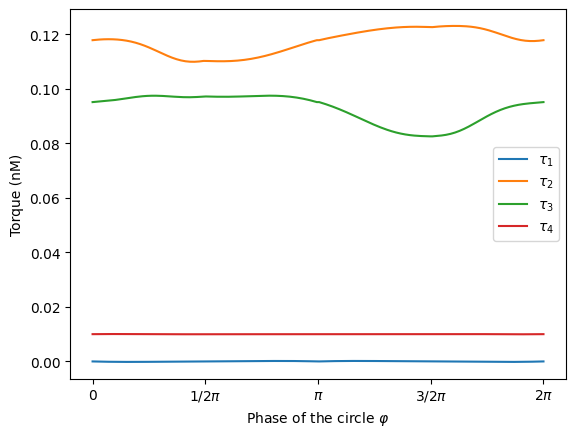

In [45]:
import fractions
x = np.linspace(0, 2, 200)
plt.plot(x, torques_np)
plt.legend([
    r'$\tau_1$',
    r'$\tau_2$',
    r'$\tau_3$',
    r'$\tau_4$',
])
plt.ylabel('Torque (nM)')
plt.xlabel(r'Phase of the circle $\varphi$')
# get_phis = lambda n:np.array([2*i*np.pi/(n-1) for i in range(torques_np.shape[0])])
ticks = np.arange(0, 2.1, 0.5)
pi_string = "$\pi$"
labels = [F'{fractions.Fraction(tick) if tick != 1 else ""}{pi_string if tick != 0 else ""}' for tick in ticks]
plt.xticks(ticks = ticks, labels = labels)